# Closed Reactive Structure

The prRN library includes a module for the search of closed reactive, semi-auto-maintained sets and organizations. Unlike the algorithms already proposed for the search of organizations, this library proposes to perform this search from minimal units of sets that generate the same closed, called atoms. 

We will start by showing how this library first allows to verify the set properties.

## Initialization of a Reaction Network
For it in first instance we initialize the library and open a Reaction Network:

In [1]:
import sys
!{sys.executable} -m pip install ../. --quiet --user #installation of library in local enviorment
from pyRN import pyRN
import numpy as np
file='../networks/rn_test.txt'
RN = pyRN.setFromText(file) # Initi of the example network

## Generated closure and strucutural properties
Once the network is initialized, for any set of species, it is possible to generate the closure of this set and also to verify structural properties related to the dynamic properties of such closure, such as whether the set is semi-self-maintained and or self-maintained.

In [2]:
sp=np.random.choice(RN.SpIdStrArray, size=5, replace=False) #Random subselection of species
RN.printSp(sp) # printing selected species
closure=RN.getClosureFromSp(sp)
print("Closure of ",sp," correspond to ",closure)
print("The set ", closure," is SSM?" , RN.isSsmFromSp(closure))
print("The set ", closure," is SM?" , RN.isSmFromSp(closure))

Species:  {s11, s3, s5, s6, s8,}
Closure of  ['s11' 's6' 's5' 's3' 's8']  correspond to  ['s1' 's10' 's11' 's2' 's3' 's4' 's5' 's6' 's7' 's8' 's9']
The set  ['s1' 's10' 's11' 's2' 's3' 's4' 's5' 's6' 's7' 's8' 's9']  is SSM? True
The set  ['s1' 's10' 's11' 's2' 's3' 's4' 's5' 's6' 's7' 's8' 's9']  is SM? True


## Atoms and basics sets
In the literature there already exist algorithms that search for the organizations of a reaction network [Florian et al (2008)](https://doi.org/10.1093/bioinformatics/btn228). To reduce the number of combination elements and therfore the time to compute the organizations, this library takes an alternative path, where the elements to be combined do not correspond to species, instead elements of a equivalance class, called generators. A generator corresponds to a set of reactions, in which the support of each reaction generates the same closed set, by means of the generated closure. Considering the latter these sets are defined by an equivalence relation:

$$r_i R r_i := G_{Cl}(\text{supp}(r_i))=G_{Cl}(\text{supp}(r_j))$$. 

Where $\text{supp}(r)$ corresponds to the support of a reaction, $G_{Cl}(X)$ to the generated closure of a set $X$. Thus the generators correspond to the equivalence classes generated by this relation. More details can be found in a publication in writing yet [link to the PNAS]().

With this in consideration of this equivalence class, all generators of a reaction network are obtained by the function `setGenerators()`:

In [3]:
RN.setGenerators()

75

The generators, then, correspond to equivalence classes of reactions that generate the same closed set. The closed sets generated by the a generator, will be called basic molecule sets, and serve as contruction entities for all reactive close sets the reaction network. The function `setGenerators()`, generates lists members of the class that describe in terms of species and reactions these sets, each element of each list describe an atom:

- `BSpListStr`: species contained in each basic molecule set
- `BRpListBt`: reactions contained in each basic molecule set
- `GSpListBt`: species contained in each generator
- `GRpListBt`: reactions contained in each generator 
- `BReacSpListBt`: species of reactants contained in each basic molecule set 
- `BProdSpListBt`: species of products contained in each basic molecule set
- `BStoichioPositiveSpListBt`: positive stoichiometric species contained in basic molecule set
- `BStoichioNegativeSpListBt`: negative stoichiometric species contained in basic molecule set
- `GInBListBt`: generator contained in each basic molecule set
- `ConnenctedBListBt`: basic molecule sets that are connected (whose has a non empty intersection between the support and the products o viceversa).
- `NotContainedBListBt`: basic molecule sets that are not contained (whose has a non empty intersection between the support and the products o viceversa).      
- `RpInWhichGArray`: corresponds to a array of integers, of the length of the number of reactions, where the integer indicates to which generator the reaction belongs.

For example the generated member elements of the first atom correspond to:

In [4]:
print("Reactions contained of the first basic molecule: ",RN.getIndArrayFromBt(RN.BRpListBt[0]))
print("Species contained in the first generator: ",RN.SpIdStrArray[RN.getIndArrayFromBt(RN.GSpListBt[0])])
print("Reactions contained of the first generator: ",RN.getIndArrayFromBt(RN.GRpListBt[0]))
print("Species of reactants contained in the first basic molecule: ",RN.SpIdStrArray[RN.getIndArrayFromBt(RN.BReacSpListBt[0])])
print("Species of products contained of the first basic molecule: ",RN.SpIdStrArray[RN.getIndArrayFromBt(RN.BProdSpListBt[0])])
print("Basic molecule sets that are dynamically conected to first basic molecule: ",RN.getIndArrayFromBt(RN.ConnectedBListBt[0]))

Reactions contained of the first basic molecule:  [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16]
Species contained in the first generator:  ['s1' 's2' 's3' 's5' 's6' 's8' 's9']
Reactions contained of the first generator:  [0, 1, 4, 5, 9, 10, 11, 12, 16]
Species of reactants contained in the first basic molecule:  ['s1' 's2' 's3' 's4' 's5' 's6' 's7' 's8' 's9']
Species of products contained of the first basic molecule:  ['s1' 's2' 's3' 's4' 's5' 's6' 's7' 's8' 's9']
Basic molecule sets that are dynamically conected to first basic molecule:  [1, 2, 3, 4, 5]


There are also two statistical functions that count how many atoms are involved in a set of species or reactions:

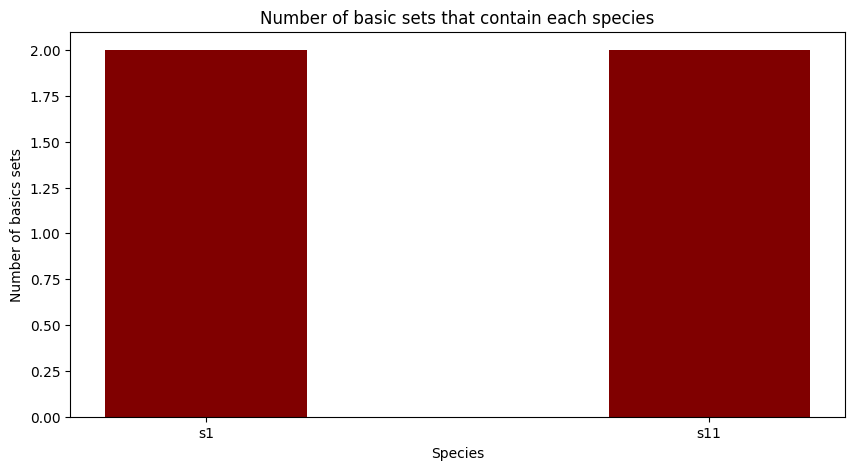

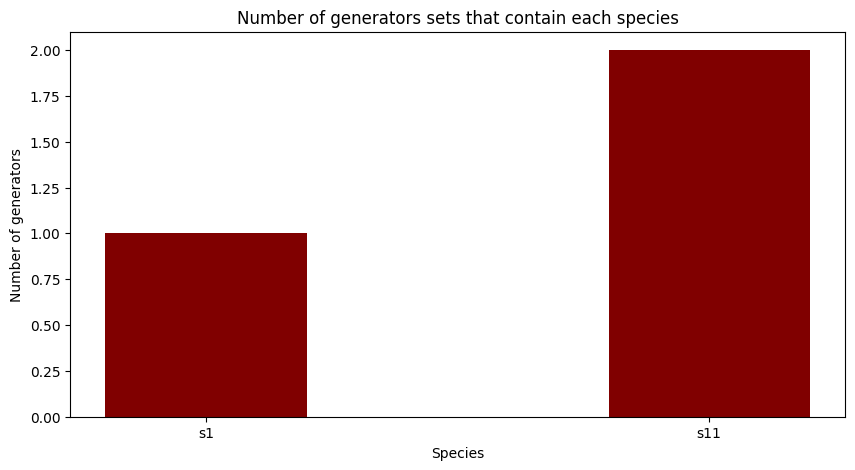

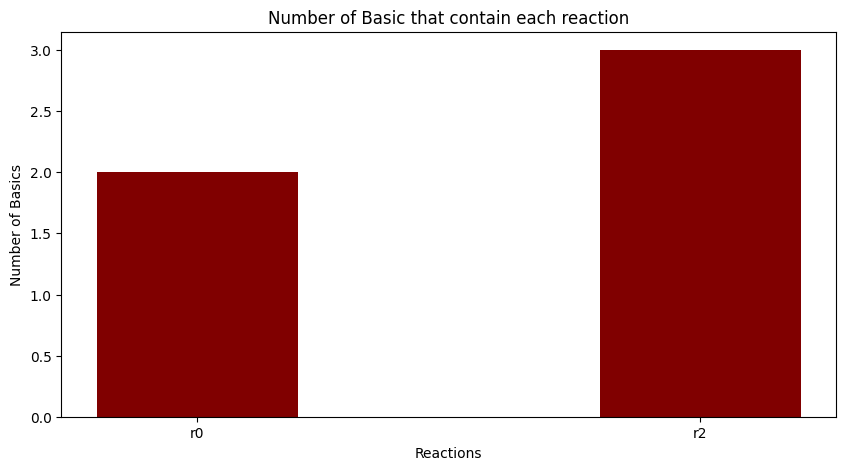

In [5]:
RN.plotSpPresenceInBG(RN.SpIdStrArray[[0,2]])
RN.plotRpPresenceInB([0,2])

## Synergies and its structure
A synergy between two closed sets $X$ and $Y$ takes place when in the closed set of generated by their union ($Z=G_{CL}(X \cup Y)$, there exists reaction(s) and/or specie(s) that are not found in the mere union of these sets ($ \exists z \in Z$ and/or $ \exists r \in R_Z$ such that $z \not \in X \cup Y$ and $ r \not \in R_X \cup R_Y$). 

The library includes a function for constructing all reactive closed set (`setSynStr()`)from the atoms generated by the previous function (`setGenerators()`). The reactive closed sets are constructed from the basic sets and the atoms. Each basic set is join and closed with all the other basic molecules sets that are not contained in it. Then it is verified if each of these union-closure corresponds to a synergy and if the resulting set is semi-self-maintained or an organization. Then this operation is repeated recursively with the generated sets, until all the reactive closures are obtained. This structure is known as synergic structure [link to paper](), and is generated by the `setSynStr()` function. This function generates a multigraph object `networkx`, where the nodes correspond to all reactive closed sets and their edges to unions-closure. The properties of the nodes account for whether the set is semi-self-maintained and/or self-maintained. While the edges whether the union-closure corresponds to a synergy or not. Te option `partial_save` correspond to the filename where for each level the `pyRN` object is saved as a pickle file. If this option is `None`, the no partial save is done.

In [6]:
RN.setSynStr(partial_save="test")

# the nodes that are self-maintained can be obtain by searching by the property
organizations = [(n,p) for n,p in RN.SynStrNx.nodes(data=True) if p['is_org']]
print("organizations nodes of the RN: ",organizations) 
# the synergistic edges can be obtain by searching by the property
syn_edges = [(u,v) for u,v,e in RN.SynStrNx.edges(data=True) if e['syn']]
print("synergetic edges of the RN: ",syn_edges)

organizations nodes of the RN:  [(frozenbitarray('111010'), {'level': 4, 'sp': array(['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9'], dtype=object), 'is_ssm': True, 'is_org': True, 'is_basic': True, 'basic_id': 0}), (frozenbitarray('011000'), {'level': 2, 'sp': array(['s4', 's5', 's6', 's7', 's8'], dtype=object), 'is_ssm': True, 'is_org': True, 'is_basic': True, 'basic_id': 1}), (frozenbitarray('001000'), {'level': 1, 'sp': array(['s4', 's6', 's8'], dtype=object), 'is_ssm': True, 'is_org': True, 'is_basic': True, 'basic_id': 2}), (frozenbitarray('111111'), {'level': 6, 'sp': array(['s1', 's10', 's11', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9'],
      dtype=object), 'is_ssm': True, 'is_org': True, 'is_basic': True, 'basic_id': 3}), (frozenbitarray('000010'), {'level': 1, 'sp': array(['s7', 's9'], dtype=object), 'is_ssm': True, 'is_org': True, 'is_basic': True, 'basic_id': 4})]
synergetic edges of the RN:  [(frozenbitarray('111010'), frozenbitarray('111111')), (frozenbitarray

The `gen_syn_str` function also generates variables such as semi-self-maintained sets (`syn_ssms`) as reactive `syn_orgs` organizations.

In [7]:
print("Semi-self-maintained sets: ",RN.SynStrSsmListSpArray) #semi-self-maintained sets
print("Organizations: ",RN.SynStrOrgListSpArray) #organizations

Semi-self-maintained sets:  [array(['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9'], dtype=object), array(['s4', 's5', 's6', 's7', 's8'], dtype=object), array(['s4', 's6', 's8'], dtype=object), array(['s1', 's10', 's11', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9'],
      dtype=object), array(['s7', 's9'], dtype=object)]
Organizations:  [array(['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9'], dtype=object), array(['s4', 's5', 's6', 's7', 's8'], dtype=object), array(['s4', 's6', 's8'], dtype=object), array(['s1', 's10', 's11', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9'],
      dtype=object), array(['s7', 's9'], dtype=object)]


The synergic structure can be visualized by `display_str()` function. It receives as input the synergic structure and generates a `pyvis` object that can be displayed using the `show()` function.

In [8]:
# Also the synergetic structure can be display
nt=RN.getStrDisplayPv(RN.SynStrNx,notebook=True)
nt.show("CStr.html")

CStr.html


As in latter description of the synergistic structure, the nodes of the figure correspond to the reactive closed sets of the reaction network and the edges correspond to the union-closure with the different generators. If the shape of the node is a sphere, such node corresponds to a basic molecule set, while if it is a square, it corresponds to a non-basic reactive closed set. The colors of the nodes, give account if the structural property releted to the dynamics, if the node is green, it corresponds to an organization, if it is blue, then is only semi-self-maintained and if it is red it does not satisfy any of the previous ones, therefore it is only reactivly closed. The colors of the edges characterize if the union-closure, if it is blue it corresponds to a spurious union, while if it is blue it corresponds to a synergy.

Each generator have correspondent collection called *minimal generators*, where each of its elements corresponds to a necessary and minimal set in size, that via it closure generated corresponded to the basic molecule. Thus any set containing one or  more of these sets, by closure will generate the associated basic set. The function `setMgen()` generates these cloections as a member list `MgenListListSpArray()`, whose components are lists of collection of minimal generators for a given generator (the correspondence of the order is the same as `GSpListBt` variable).

In [9]:
RN.setMgen()
print("minimal generators of the first atom:")
RN.printSpIdFromBt(RN.MgenListListSpArray[0])

minimal generators of the first atom:


'species set 0={s1, s2} species set 1={s1, s3} species set 2={s8, s9} species set 3={s2, s6} species set 4={s3, s5} species set 5={s1, s8} species set 6={s3, s9} species set 7={s2, s3} '

We can notice that the sets of the collection of a minimal generator have non empty intersection between them. 

All synergy can be minimally described in how combinations of generators are able to trigger other generator. This can be represented similar to a reaction:

$$g_1+g_3 \to g_2 $$

This type of *reaction* consists of only one generator in the productive part. This type of minimal synergy is constructed by seeing which combination of generators are capable by their union, contian any of the minimal generators described above, and so to triger the related generator.
 
This minimal description allows then to outline all synergies by analyzing how they are triggered by the union-closure, analogously to the generated closure. To generate all minimal synergies, the `setSyn()` function is used. This generates two member variables `SynReacListGBt` the productive part of the minimal synergy, `SynProdListGBt` the triggered part of the minimal synergy.


In [10]:
RN.setSyn()
print("minimal first sinergy reactive part: ",RN.getIndArrayFromBt(RN.SynReacListGBt[0]))
print("minimal first sinergy reactive part: ",RN.getIndArrayFromBt(RN.SynProdListGBt[0]))

minimal first sinergy reactive part:  [2, 4]
minimal first sinergy reactive part:  [0]


It is also possible to display all minimum synergies using the `displaySynPv()` function, which generates a `pyvis` object

In [11]:
nt=RN.displaySynPv(notebook=True) # creation of pyvis object
nt.show("syn.html") # visualization of all minimal synergies

syn.html


 There is also an function (`SynStrOrgListSpArray`) that for a given set, calculates all possibles synergies that can be done whit it. This function can only be run after generating all minimal synergies:

In [12]:
print(RN.getSynFromSp(RN.SynStrOrgListSpArray[1]))

[[array(['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9'], dtype=object)], [array(['s7', 's9'], dtype=object)]]


The returned element corresponds to a list of lists. For a list element, the first one corresponds to the generated synergy, while the second corresponds to the closed set with which the synergy was performed.